In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

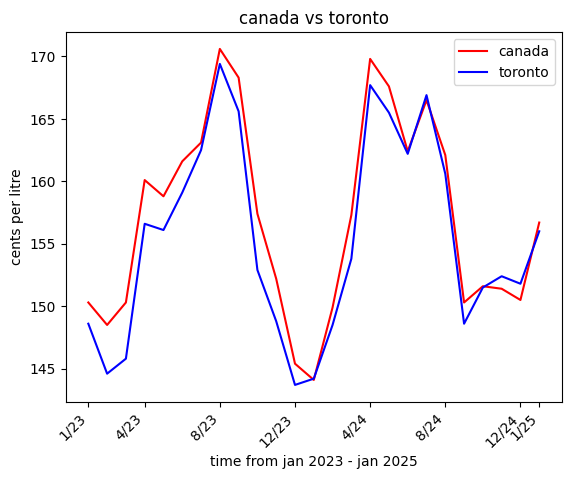

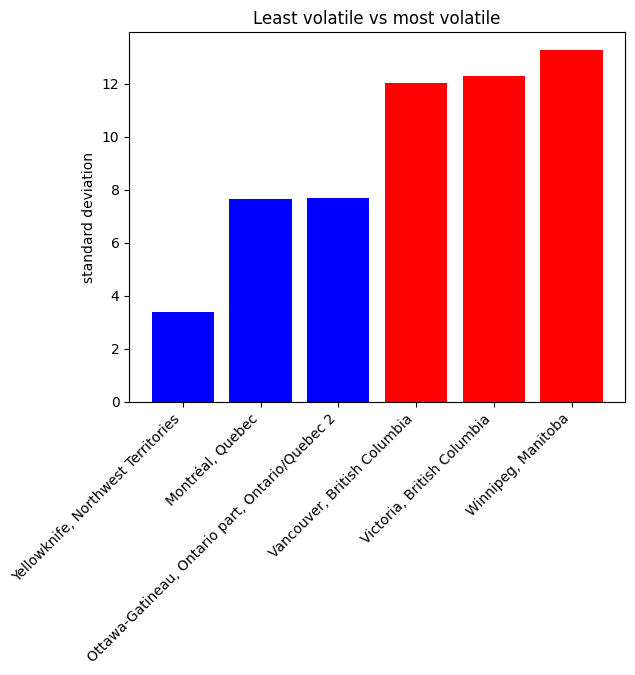

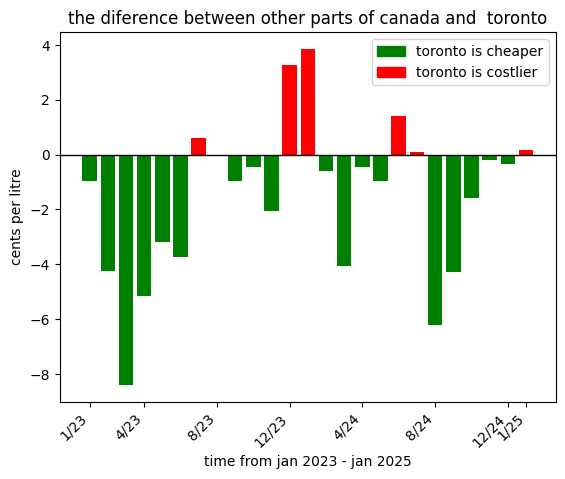

'\nQ1 I plotted a line graph, i chose it because we wanted to see the correlation of two sets of data,\nover a period of time, initially I wanted to do a side by side bar graph,\nbut because of we had 24 x values it wuld be visually unappealing\nQ2 I chose a bar graph because the x values were much smaller, volatiltiy was measured by size of standar deviation\nthis way people can see which parts change the most and the least\nq3 Lastly i chose a bar graph because i wanted to show the change,\nand i chose to find the difference between each set of data\ndue to subtraction there would be negative values and i chose to create a new legend\nto display the negative values and explain what it means \n'

In [4]:
df = pd.read_csv('unlead.csv')

def q1():
    x = df.columns[1:]
    d = [0]*len(x)
    ticks = []
    for i in range(len(x)):
        t = (i+1)%12
        if t == 0:
            t=12
        d[i] = (str(t)+"/" + x[i][:2])
        if (i+1)%4 == 0 or i+1 == 1 or i+1 == len(x):
            ticks.append(d[i])
    can = df[df["Geography"] == "Canada"].drop("Geography", axis = 1).to_numpy().flatten()
    tor = df[df["Geography"] == "Toronto, Ontario"].drop("Geography", axis = 1).to_numpy().flatten()
    plt.plot(d, can, label="canada", color = "red")
    plt.plot(d, tor, label="toronto", color = "blue")
    plt.title("canada vs toronto")
    plt.legend()
    plt.xlabel("time from jan 2023 - jan 2025")
    plt.ylabel("cents per litre")
    plt.xticks(ticks, rotation=45, ha="right")
    plt.show()
    return()
def q2():
    reg = df[df["Geography"] != "Canada"]
    gasprice = reg.drop("Geography",axis = 1)
    row_sd = gasprice.std(axis=1).sort_values()
    rowarr = row_sd.to_numpy().flatten()
    geo =reg["Geography"]
    y = np.concatenate((rowarr[:3],rowarr[-3:len(rowarr)]))


    ind = row_sd.index.to_numpy().flatten()
    ind = np.concatenate((ind[:3],ind[-3:len(ind)]))
    x = geo.loc[ind].to_numpy().flatten()
    colors = ['blue' if i < len(x)//2 else 'red' for i in range(len(x))]
    plt.bar(x,y, color = colors)
    plt.title("Least volatile vs most volatile")
    plt.ylabel("standard deviation")
    plt.xticks(rotation=45, ha="right")  
    plt.show()
    return

def q3():
    x = df.columns[1:]
    d = [0]*len(x)
    ticks = []
    for i in range(len(x)):
        t = (i+1)%12
        if t == 0:
            t=12
        d[i] = (str(t)+"/" + x[i][:2])
        if (i+1)%4 == 0 or i+1 == 1 or i+1 == len(x):
            ticks.append(d[i])
    tor = df[df["Geography"] == "Toronto, Ontario"].drop("Geography", axis = 1).to_numpy().flatten()
    ottawa = df[df["Geography"] == "Ottawa-Gatineau, Ontario part, Ontario/Quebec 2"].drop("Geography", axis = 1).to_numpy().flatten()
    tbay = df[df["Geography"] == "Thunder Bay, Ontario 3"].drop("Geography", axis = 1).to_numpy().flatten()
    avg = (ottawa+tbay)/2
    avg = (tor-avg)
    pos_patch = mpatches.Patch(color="green", label="toronto is cheaper")
    neg_patch = mpatches.Patch(color="red", label="toronto is costlier")

    plt.legend(handles=[pos_patch, neg_patch])
    plt.bar(d ,avg, color=["red" if v >= 0 else "green" for v in avg])

    plt.title("the diference between other parts of canada and  toronto")
    plt.axhline(0, color="black", linewidth=1)
    plt.xlabel("time from jan 2023 - jan 2025")
    plt.ylabel("cents per litre")
    plt.xticks(ticks, rotation=45, ha="right")
    plt.show()
q1()
q2()
q3()
"""
Q1 I plotted a line graph, i chose it because we wanted to see the correlation of two sets of data,
over a period of time, initially I wanted to do a side by side bar graph,
but because of we had 24 x values it wuld be visually unappealing
Q2 I chose a bar graph because the x values were much smaller, volatiltiy was measured by size of standar deviation
this way people can see which parts change the most and the least
q3 Lastly i chose a bar graph because i wanted to show the change,
and i chose to find the difference between each set of data
due to subtraction there would be negative values and i chose to create a new legend
to display the negative values and explain what it means
"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')